**Intervalo de Confiança - COVID 19**

Fonte do intervalo de confiança: https://towardsdatascience.com/get-confidence-intervals-for-any-model-performance-metrics-in-machine-learning-f9e72a3becb2

The percentile bootstrap methodology for estimating the confidence interval is as follows:

1- Generate nboots “bootstrap sample” datasets, each the same size as the original test set. Each sample dataset is obtained by drawing instances at random from the test set with replacement.

2- On each of the sample datasets, calculate the metric and save it.

3- The 95% confidence interval is given by the 2.5th to the 97.5th percentile among the nboots calculated values of the metric. If nboots=1001 and you sorted the values in a series/array/list X of length 1001, the 0th percentile is X[0] and the 100th percentile is X[1000], so the confidence interval would be given by X[25] to X[975].

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel('Planilha COVID-19 completa.xlsx', header=1)
num_classes = dataset['Classif. OMS'].nunique()
print(num_classes)

class_names = dataset['Classif. OMS'].unique()
print(class_names)

5
['GRAVE' 'OBITO' 'MODERADO' 'LEVE' 99999 nan]


In [2]:
dataset = pd.read_excel('Planilha COVID-19 completa.xlsx', header=1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dataset.replace(99999, np.nan, inplace = True)
dataset.replace(99999.0, np.nan, inplace = True)
teste = (dataset.isnull().sum()/dataset.shape[0]) * 100
teste1 = pd.DataFrame(teste,columns=list('A'))
teste1.reset_index(level=0, inplace=True)
teste1 = teste1.rename(columns={'index':'Campos','A': 'Valores'})
teste1.loc[teste1['Valores']>30]
teste1.drop(teste1.loc[teste1['Valores']<30].index, inplace=True)
for ind in teste1.index:
  dataset = dataset.drop(teste1['Campos'][ind], axis=1)
dataset.dropna(inplace=True)
dataset.describe().round(2)
dataset.corr().round(2)
dataset2 = pd.DataFrame(dataset)
dataset2.to_csv('nome_do_arquivo.csv')
dataset3 = pd.read_csv('nome_do_arquivo.csv',encoding='utf-8')

#MELHORAR MODELO= MELHORAR QUALIDADE DOS DADOS = REMOVER COLUNAS QUE CLARAMENTE NAO TEM CONTRIBUIÇÃO DIRETA (EXEMPLO: DATAS)

dataset3 = dataset3[[

 'Classif. OMS modif.',
 'Classif. NIH',
 'Classif. Guideline (7th ed.)',
 'Idade (anos)',
 'Sexo',
 'Tempo de Internação (dias)',
 'Semana Epidemiológica',
 'Febre',
 'Dor de garganta',
 'Tosse seca',
 'Tosse produtiva',
 'Dispnéia / Desconforto respiratório',
 'Astenia',
 'Cefaleia',
 'Saturação de O2 <95',
 'Mal estar geral',
 'Dor em articulações',
 'Dor muscular',
 'Dor abdominal',
 'Diarreia',
 'Vômitos',
 'Alteração do olfato e do paladar',
 'Coriza / Congestão Nasal',
 'Aperto torácico',
 'Dor no corpo',
 'Nauseas',
 'D1',
 'DATA D1',
 'Síndrome de Down',
 'Diabetes',
 'HAS',
 'HIV',
 'Doença cardíaca crônica',
 'Doença hepática crônica',
 'Doença renal crônica',
 'Doença hematológica crônica',
 'Neoplasia',
 'Pneumopatia crônica',
 'Asma',
 'DPOC',
 'Bronquiectasia',
 'DPID',
 'Tuberculose',
 'Doença reumatológica',
 'Obesidade',
 'Uso de imunossupressor',
 'Doença congênita',
 'Desnutrição',
 'Temp. máx (°C)',
 'Pressão SISTOLICA + baixa ',
 'Pressão DIASTOLICA + baixa',
 'F.R mais alta',
 'F.C mais alta',
 'Saturação O2 mais baixa',
 'Suplementação de O2',
 'Suporte ventilatório',
 'Medicação vasopressora',
 'Diálise/hemodiálise',
 'Parada cardiorespiratório',
 'Sepsis',
 'Choque',
 'Falência miocárdica',
 'Infarto miocárdio',
 'Insuficiência renal',
 'Glicemia (HGT)',
 'Leucócitos totais (/μL)',
 ' Plaquetas',
 'TGP',
 'Creatinina',
 'Proteína C reativa (mg/L)',
 'UREIA (mg/dL)',
 'Antibiótico',
 'Antiviral (Oseltamivir)',
 'Anticoagulante (Enoxaparina ou Análogo)',
 'Broncodilatador',
 'Cloroquina / Hidroxicloroquina',
 'Corticoterapia',
 'SRAG',
 'Desfecho',
 'internação - desfecho',
 'Classif. OMS']]

<ipython-input-2-6e924b477957>:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr().round(2)


In [3]:
#Speracao dos Dados
previsores = dataset3.iloc[:, 0:80].values # da primeira coluna a penultima
classe     = dataset3.iloc[:,80].values # Coluna Classif OMS

previsores = pd.DataFrame(previsores)
previsores = pd.get_dummies(previsores, drop_first=True)

#Divisão dos Dados
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.30, random_state=0)

#Normalizacao dos Dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores_treinamento = scaler.fit_transform(previsores_treinamento) # apenas no conjunto de previsores_treinamento
previsores_teste = scaler.transform(previsores_teste) # aplica a transformação aos dados de teste

previsores_outlier = previsores_treinamento.clip(-1,1) # trata valores extremos
previsores_treinamento = previsores_outlier
previsores_teste = previsores_teste.clip(-1,1)

<ipython-input-3-9807a8801826>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  previsores = pd.get_dummies(previsores, drop_first=True)
<ipython-input-3-9807a8801826>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  previsores = pd.get_dummies(previsores, drop_first=True)
<ipython-input-3-9807a8801826>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  previsores = pd.get_dummies(previsores, drop_first=True)
<ipython-input-3-9807a8801826>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  previsores = pd.get_dummies(previsores, drop_first=True)
<ipython-input-3-9807a880182

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,ShuffleSplit

param_grid = {
      'bootstrap': [True, False],
      'max_depth': [20,25,100],
      'max_features': ['auto', 'sqrt'],
      'min_samples_leaf': [3, 4, 5],
      'min_samples_split': [2, 5],
      'n_estimators': [100, 200]
}

classifier = RandomForestClassifier()

#A busca de hiperparâmetros é realizada usando cross-validation de 10 vezes (cv=10)
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                            cv = 10, n_jobs = -1, verbose = 2)
  
X_train, X_test = previsores_treinamento, previsores_teste
y_train, y_test = classe_treinamento, classe_teste

#Uma vez que já achou os melhores parametros para a floresta randomica,
# e que isso demora muito pra fazer, por sinal, as linhas abaixo podem ficar comentadas
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
{'bootstrap': False, 'max_depth': 25, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Defina o conjunto de hiperparâmetros que você deseja pesquisar
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPClassifier(max_iter=100)

X_train, X_test = previsores_treinamento, previsores_teste
y_train, y_test = classe_treinamento, classe_teste

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
clf.fit(X_train, y_train) # X_train e y_train são os seus dados

# Os melhores parâmetros do GridSearchCV
print('Best parameters found:\n', clf.best_params_)


Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'adam'}


In [ ]:
#rede neural - Modelo
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,ShuffleSplit
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report

model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64,64,64), max_iter = 100000, random_state=0) 
model_sem_treino = model
model.fit(X_train,y_train)

#matriz de confusão
y_pred=model.predict(X_test)
matrix=confusion_matrix(y_test,y_pred)

#cross validation, k =cv =10
precisao = cross_validate(model, X_train,y_train,scoring='precision_weighted', cv=10)
acuracia = cross_validate(model, X_train, y_train, cv=10, scoring='accuracy')        
f1       = cross_val_score(model, X_train, y_train, cv=10, scoring='f1_weighted')

print("Acurácia = " + str(acuracia['test_score'].mean()))
print("Precisão = " + str(precisao['test_score'].mean()))
print("F1-score: {:.2f} (+/- {:.2f})".format(f1.mean(), f1.std() * 2))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

Acurácia = 0.9189542483660131
Precisão = 0.8909164365046719
F1-score: 0.90 (+/- 0.14)


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, accuracy_score, f1_score

# Fit the model
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64,64,64), max_iter = 100000, random_state=0) 
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Accuracy: ", accuracy)
print("F1 Score: ", f1)



Precision:  0.9082385552973786
Accuracy:  0.8918918918918919
F1 Score:  0.8727350695500959


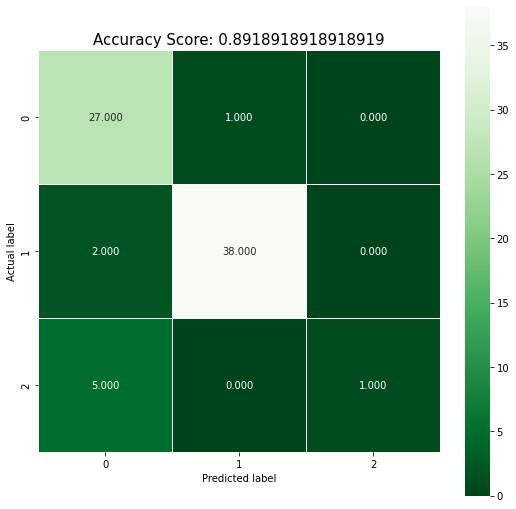

In [ ]:
#Matriz de Confusão da Rede Neural
plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

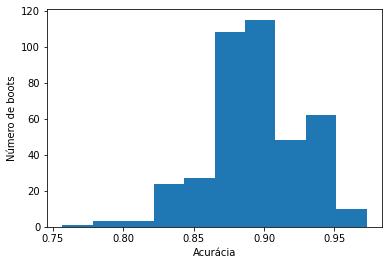

Intervalo de confiança : [0.8243243243243243,0.9459459459459459]
Acurácia 'real' do modelo performada no teste : 0.8918918918918919


In [ ]:
import random
import numpy as np
import plotly.express as px

# Intervalo de confiança da acurácia da rede neural

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas
# Notar que, obiviamente, o cálculo da confiança da métrica acurácia usa o X_test

# BOOT COMO NUMPY.ARRAY AO INVES DE DATAFRAME - MELHROU MUITO

def new_boot(X_test, y_test):
  novo_X = X_test.copy()

  novo_Y = y_test.copy()

  c= 0
  while c < len(X_test):
    rand = random.randint(0,len(X_test)-1)
    novo_X[c] = X_test[rand].copy()
    novo_Y[c] = y_test[rand]
    c= c+1
  
  return novo_X , novo_Y

# Pega a acurácia de um boot
# Ajuste em pegar a mérica sem ser pelo report
def pegar_acuracia_do_relatorio(novo_X , novo_Y):
                     
  return accuracy_score(novo_Y, model.predict(novo_X), sample_weight=None)

# calcula a distribuição dos boots  
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  x, y = new_boot(X_test, y_test)
  lista_boots.append(pegar_acuracia_do_relatorio(x, y))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada

alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
print("Acurácia 'real' do modelo performada no teste : "+ str(accuracy_score(y_test, model.predict(X_test), sample_weight=None)))

# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.

In [ ]:
#Floresta Randomica - Modelo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

modelRF = RandomForestClassifier(bootstrap=False, max_depth=20, 
                                 max_features='auto', min_samples_leaf=3,
                                 min_samples_split=2, n_estimators=200)

modelRF_sem_treino = modelRF
modelRF.fit(X_train, y_train)

y_pred = modelRF.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)

precisao = cross_val_score(modelRF, X_train, y_train, scoring='precision_weighted', cv=10)
acuracia = cross_val_score(modelRF, X_train, y_train, cv=10, scoring='accuracy')
f1 = cross_val_score(modelRF, X_train, y_train, cv=10, scoring='f1_weighted')

print("Acurácia: {:.2f} (+/- {:.2f})".format(acuracia.mean(), acuracia.std() * 2))
print("Precisão: {:.2f} (+/- {:.2f})".format(precisao.mean(), precisao.std() * 2))
print("F1-score: {:.2f} (+/- {:.2f})".format(f1.mean(), f1.std() * 2))


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr

Acurácia: 0.81 (+/- 0.15)
Precisão: 0.76 (+/- 0.17)
F1-score: 0.78 (+/- 0.17)


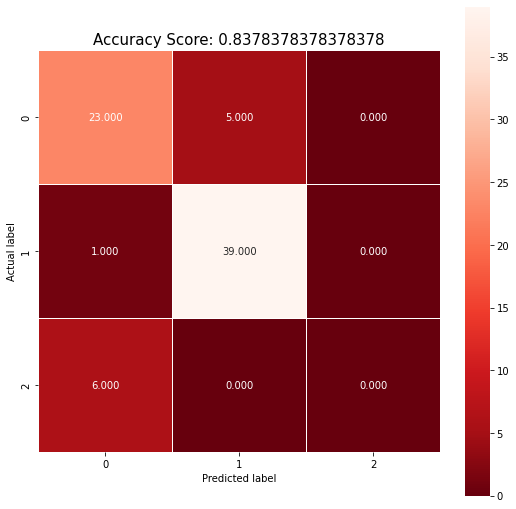

In [ ]:
#Matriz de Confusão Floresta Randomica
plt.figure(figsize=(9,9))
sns.heatmap(matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

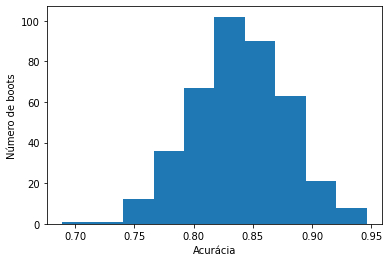

Intervalo de confiança : [0.7567567567567568,0.918918918918919]
Acurácia 'real' do modelo performada no teste : 0.8378378378378378


In [ ]:
# Intervalo de confiança da acurácia da regressão logística
import random
import numpy as np
import plotly.express as px

# cria boot de acordo com as regras do artigo : 1- size_test= size_boot , 2- repetições permitidas
# Notar que, obiviamente, o cálculo da confiança da métrica acurácia usa o X_test

# BOOT COMO NUMPY.ARRAY AO INVES DE DATAFRAME - MELHROU MT

def new_boot(X_test, y_test):
  novo_X = X_test.copy()

  novo_Y = y_test.copy()

  c= 0
  while c < len(X_test):
    rand = random.randint(0,len(X_test)-1)
    novo_X[c] = X_test[rand].copy()
    novo_Y[c] = y_test[rand]

    c= c+1
  

  return novo_X , novo_Y

# Pega a acurácia de um boot
# Ajuste em pegar a mérica sem ser pelo report
def pegar_acuracia_do_relatorio(novo_X , novo_Y):
                     
  return accuracy_score(novo_Y, modelRF.predict(novo_X), sample_weight=None)

# calcula a distribuição dos boots
  
numero_boots = 401
lista_boots = []
contador = 0

while contador < numero_boots:
  x, y = new_boot(X_test, y_test)
  lista_boots.append(pegar_acuracia_do_relatorio(x, y))
  contador =contador +1

plt.hist(lista_boots) 
plt.xlabel('Acurácia')
plt.ylabel('Número de boots')
plt.show() 

#converte a lista em float explicitamente para a função percentile ser aplicada
array = list()
for elemento in lista_boots:
  array.append(float(elemento))

# calcula os limites da integral da gaussiana que correspondem a área desejada
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  np.percentile(array, p) 
p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  np.percentile(array, p)

print("Intervalo de confiança : ["+str(lower)+","+str(upper)+"]")
print("Acurácia 'real' do modelo performada no teste : "+ str(accuracy_score(y_test, modelRF.predict(X_test), sample_weight=None)))

# Observação, de acordo com o teorema do limite central, quanto maior o número de boots, mais a distribuição gaussiana ficará melhor definida.

O resultado dos testes mostram que não há diferença significativa entre a Regressão Logística e a Rede Neural (p > 0,05), mas há diferença significativa entre a Regressão Logística e a Floresta Randomica (p < 0,05). Isso significa que, **com base nesses testes**, a **Floresta Randomica** é a melhor opção entre os três modelos avaliados.

O **resultado dos testes** mostram que não há diferença significativa entre a Regressão Logística e a Rede Neural (p > 0,05), mas há diferença significativa entre a Regressão Logística e a Floresta Randomica (p < 0,05). Isso significa que, com base nesses testes, a Floresta Randomica é a melhor opção entre os três modelos avaliados.

In [ ]:
# ttest - Regressão Logistica e Rede neural
from mlxtend.evaluate import paired_ttest_5x2cv

t, p = paired_ttest_5x2cv(estimator1=logistic_regression_sem_treino,estimator2=model_sem_treino,X=previsores, y=classe)
alpha = 0.05

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
  print("Fail to reject null hypotesis")
else:
  print("Reject null hypotesis")

t statistic: -1.852
aplha  0.05
p value: 0.123
Fail to reject null hypotesis


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# ttest - Rede Neural e Floresta randomica

t, p = paired_ttest_5x2cv(estimator1=model_sem_treino,estimator2=modelRF_sem_treino,X=previsores, y=classe)
alpha = 0.05

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
  print("Fail to reject null hypotesis")
else:
  print("Reject null hypotesis")

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

t statistic: 2.260
aplha  0.05
p value: 0.073
Fail to reject null hypotesis


In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv

# ttest - Regressão e Floresta randomica

t, p = paired_ttest_5x2cv(estimator1=logistic_regression_sem_treino,estimator2=modelRF_sem_treino,X=previsores, y=classe)
alpha = 0.05

print('t statistic: %.3f' % t)
print('aplha ', alpha)
print('p value: %.3f' % p)

if p > alpha:
  print("Fail to reject null hypotesis")
else:
  print("Reject null hypotesis")

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

t statistic: 3.303
aplha  0.05
p value: 0.021
Reject null hypotesis
